In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [3]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# 数据的格式：特征
names = [u'Age', u'Number of sexual partners', u'First sexual intercourse',
       u'Num of pregnancies', u'Smokes', u'Smokes (years)',
       u'Smokes (packs/year)', u'Hormonal Contraceptives',
       u'Hormonal Contraceptives (years)', u'IUD', u'IUD (years)', u'STDs',
       u'STDs (number)', u'STDs:condylomatosis',
       u'STDs:cervical condylomatosis', u'STDs:vaginal condylomatosis',
       u'STDs:vulvo-perineal condylomatosis', u'STDs:syphilis',
       u'STDs:pelvic inflammatory disease', u'STDs:genital herpes',
       u'STDs:molluscum contagiosum', u'STDs:AIDS', u'STDs:HIV',
       u'STDs:Hepatitis B', u'STDs:HPV', u'STDs: Number of diagnosis',
       u'STDs: Time since first diagnosis', u'STDs: Time since last diagnosis',
       u'Dx:Cancer', u'Dx:CIN', u'Dx:HPV', u'Dx', u'Hinselmann', u'Schiller',
       u'Citology', u'Biopsy']
path = "datas/risk_factors_cervical_cancer.csv"  # 数据文件路径
data = pd.read_csv(path)

In [5]:
## 模型存在多个需要预测的y值，如果是这种情况下，
## 简单来讲可以直接模型构建，在模型内部会单独的处理每个需要预测的y值，
## 相当于对每个y创建一个模型
X = data[names[0:-4]]  
Y = data[names[-4:]]  # 后四列为目标值
X.head(1)#随机森林可以处理多个目标变量的情况

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,?,?,0,0,0,0


In [6]:
#空值的处理  用np.NAN的值进行填充
X = X.replace("?", np.NAN)
X.head(1)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0


In [15]:
Y.head(1)

,Hinselmann,Schiller,Citology,Biopsy
0,0,0,0,0


In [8]:
# 使用Imputer给定缺省值，默认的是以mean
# 对于缺省值，进行数据填充；默认是以列/特征的均值填充
imputer = Imputer(missing_values="NaN")
X = imputer.fit_transform(X, Y)
X[:1]

array([[18.        ,  4.        , 15.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  6.14084507,  5.81690141,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [9]:
X.shape

(858, 32)

In [10]:
# 数据分割 X.shape = (858, 32)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print ("训练样本数量:%d,特征属性数目:%d,目标属性数目:%d" % (x_train.shape[0],x_train.shape[1],y_train.shape[1]))
print ("测试样本数量:%d" % x_test.shape[0])

训练样本数量:686,特征属性数目:32,目标属性数目:4
测试样本数量:172


In [11]:
#标准化
ss = MinMaxScaler()  # 分类模型，经常使用的是minmaxscaler归一化，回归模型经常用standardscaler
x_train = ss.fit_transform(x_train, y_train)
x_test = ss.transform(x_test)
print("x_trian's shape:\n", x_train.shape)

x_trian's shape:
 (686, 32)


In [12]:
#  降维 降成2维的特征，便于后续的画图观察
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
print('x_train shape:', x_train.shape)
print(pca.explained_variance_ratio_)

x_train shape: (686, 2)
[0.24021831 0.2067443 ]


In [13]:
# 随机森林模型
### n_estimators：迭代次数，每次迭代为Y产生一个模型
forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=1, random_state=0)
forest.fit(x_train, y_train)  # max_depth一般不宜设置过大，把每个模型作为一个弱分类器

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
# 模型效果评估
score = forest.score(x_test, y_test)
print ("准确率:%.2f%%" % (score * 100))

准确率:89.53%


In [16]:
# y_test为测试集 shape：（172， 4）
print('y_test shape:', y_test.shape)
# y_test[names[-4]]  -> Hinselmann ->shape：（172,| 1）
print('y_test[names[-4]] shape:', y_test[names[-4]].shape)
# one_hot
y_test_0_one_hot = label_binarize(y_test[names[-4]],classes=(0,1,2))
print('y_test[names[-4]] one_hot:', '\n', y_test_0_one_hot[0:5])
# 转置取前两列，第三列舍弃(第三列是在上方亚编码时为了生成相应的数组)
print('Transposition, take two column：', '\n', y_test_0_one_hot.T[0: -1])
# 再转置后进行扁平化
print('Transposition + ravel：', '\n', y_test_0_one_hot.T[0: -1].T.ravel())

y_test shape: (172, 4)
y_test[names[-4]] shape: (172,)
y_test[names[-4]] one_hot: 
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
Transposition, take two column： 
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Transposition + ravel： 
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 

In [17]:
# 模型预测 -> prodict_proba 输出概率
forest_y_score = forest.predict_proba(x_test)  
# 计算ROC值 对于y的每一个标签，转换参考上方代码块
forest_fpr1, forest_tpr1, _ = metrics.roc_curve(label_binarize(y_test[names[-4]],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[0].ravel())
forest_fpr2, forest_tpr2, _ = metrics.roc_curve(label_binarize(y_test[names[-3]],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[1].ravel())
forest_fpr3, forest_tpr3, _ = metrics.roc_curve(label_binarize(y_test[names[-2]],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[2].ravel())
forest_fpr4, forest_tpr4, _ = metrics.roc_curve(label_binarize(y_test[names[-1]],classes=(0,1,2)).T[0:-1].T.ravel(), forest_y_score[3].ravel())
# AUC值
auc1 = metrics.auc(forest_fpr1, forest_tpr1)
auc2 = metrics.auc(forest_fpr2, forest_tpr2)
auc3 = metrics.auc(forest_fpr3, forest_tpr3)
auc4 = metrics.auc(forest_fpr4, forest_tpr4)

print ("Hinselmann目标属性AUC值：", auc1)
print ("Schiller目标属性AUC值：", auc2)
print ("Citology目标属性AUC值：", auc3)
print ("Biopsy目标属性AUC值：", auc4)

Hinselmann目标属性AUC值： 0.9901974040021634
Schiller目标属性AUC值： 0.9559221200648998
Citology目标属性AUC值： 0.9637979989183343
Biopsy目标属性AUC值： 0.9568685776095187


In [18]:
print('y的预测值,倒数第四列')
print(forest_y_score[0].ravel()[:6])
print('y的实际值：倒数第四列')
print(label_binarize(y_test[names[-4]],classes=(0,1,2)).T[0:-1].T.ravel()[:6])

y的预测值,倒数第四列
[0.95877997 0.04122003 0.94747819 0.05252181 0.94734968 0.05265032]
y的实际值：倒数第四列
[1 0 1 0 1 0]


In [19]:
# 补充内容：
# label_binarize使用示例
## 1.
label_binarize(['a','a','b','b'],classes=('a','b','c'))

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [20]:
# label_binarize使用示例
## 2.
label_binarize(['a','a','b','b'],classes=('a','b','c')).T[:-1].T.ravel()

array([1, 0, 1, 0, 0, 1, 0, 1])

In [22]:
# 正确的数据
y_true = label_binarize(y_test[names[-4]],classes=(0,1,2)).T[0:-1].T.ravel()
print('y_true:\n', y_true)
# 预测的数据 => 获取第一个目标属性的预测值，并将其转换为一维的数组
y_predict = forest_y_score[0].ravel()
print('y_predict:\n', y_true)
# 计算的值
# False Positive Rate——True Positive Rate——
metrics.roc_curve(y_true, y_predict)

y_true:
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0]
y_predict:
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 

(array([0.        , 0.        , 0.        , 0.00581395, 0.00581395,
        0.00581395, 0.00581395, 0.00581395, 0.00581395, 0.00581395,
        0.00581395, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
        0.01162791, 0.01162791, 0.01162791, 0.01744186, 0.03488372,
        0.04651163, 0.0755814 , 0.11046512, 0.14534884, 0.25      ,
        0.25581395, 0.26744186, 0.29069767, 0.46511628, 0.47093023,
        0.49418605, 0.59302326, 0.72093023, 0.76162791, 0.90697674,
        1.        ]),
 array([0.09302326, 0.23837209, 0.27906977, 0.40697674, 0.50581395,
        0.52906977, 0.53488372, 0.70930233, 0.73255814, 0.74418605,
        0.75      , 0.85465116, 0.88953488, 0.9244186 , 0.95348837,
        0.96511628, 0.98255814, 0.98837209, 0.98837209, 0.98837209,
        0.98837209, 0.98837209, 0.98837209, 0.98837209, 0.99418605,
        0.99418605, 0.99418605, 0.99418605, 0.99418605, 0.99418605,
        0.99418605, 0.99418605, 1.        , 1.        , 1.        ,
        1.        ]),
 arr

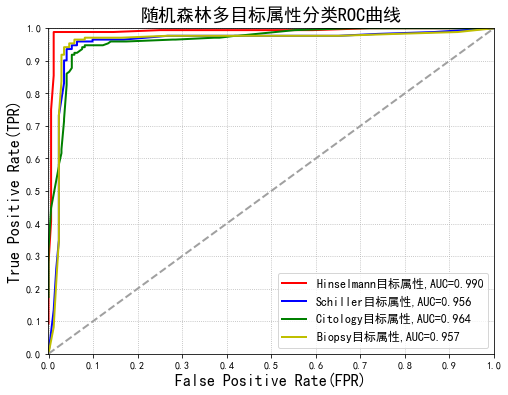

In [23]:
## 8. 画图（ROC图）
plt.figure(figsize=(8, 6), facecolor='w')
plt.plot(forest_fpr1, forest_tpr1, c='r', lw=2, label=u'Hinselmann目标属性,AUC=%.3f' % auc1)
plt.plot(forest_fpr2, forest_tpr2, c='b', lw=2, label=u'Schiller目标属性,AUC=%.3f' % auc2)
plt.plot(forest_fpr3, forest_tpr3, c='g', lw=2, label=u'Citology目标属性,AUC=%.3f' % auc3)
plt.plot(forest_fpr4, forest_tpr4, c='y', lw=2, label=u'Biopsy目标属性,AUC=%.3f' % auc4)
plt.plot((0,1), (0,1), c='#a0a0a0', lw=2, ls='--')
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)', fontsize=16)
plt.ylabel('True Positive Rate(TPR)', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'随机森林多目标属性分类ROC曲线', fontsize=18)
plt.show()

In [24]:
# 比较不同树数目、树最大深度的情况下随机森林的正确率
# 一般情况下，初始的随机森林树个数是100，深度1，如果需要我们再进行优化操作
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.5, random_state=0)
print ("训练样本数量%d，测试样本数量:%d" % (x_train2.shape[0], x_test2.shape[0]))
## 比较
estimators = [1,50,100,500]  # 决策树的数目
depth = [1,2,3,7,15]         # 树的深度
err_list = []
for es in estimators:
    es_list = []
    for d in depth:
        tf = RandomForestClassifier(n_estimators=es, criterion='gini', max_depth=d, max_features = None, random_state=0)
        tf.fit(x_train2, y_train2)
        st = tf.score(x_test2, y_test2)
        err = 1 - st
        es_list.append(err)
        print ("%d决策树数目，%d最大深度，正确率:%.2f%%" % (es, d, st * 100))
    err_list.append(es_list)

训练样本数量429，测试样本数量:429
1决策树数目，1最大深度，正确率:86.48%
1决策树数目，2最大深度，正确率:86.95%
1决策树数目，3最大深度，正确率:84.62%
1决策树数目，7最大深度，正确率:82.75%
1决策树数目，15最大深度，正确率:78.09%
50决策树数目，1最大深度，正确率:86.71%
50决策树数目，2最大深度，正确率:86.48%
50决策树数目，3最大深度，正确率:86.48%
50决策树数目，7最大深度，正确率:86.25%
50决策树数目，15最大深度，正确率:84.38%
100决策树数目，1最大深度，正确率:86.95%
100决策树数目，2最大深度，正确率:86.25%
100决策树数目，3最大深度，正确率:86.48%
100决策树数目，7最大深度，正确率:86.25%
100决策树数目，15最大深度，正确率:85.08%
500决策树数目，1最大深度，正确率:86.48%
500决策树数目，2最大深度，正确率:86.48%
500决策树数目，3最大深度，正确率:86.48%
500决策树数目，7最大深度，正确率:86.25%
500决策树数目，15最大深度，正确率:84.85%


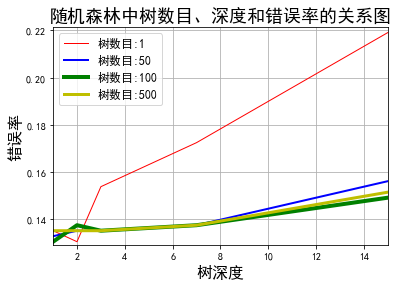

In [25]:
## 画图
plt.figure(facecolor='w')
i = 0
colors = ['r','b','g','y']
lw = [1,2,4,3]
max_err = 0
min_err = 100
for es,l in zip(estimators,err_list):
    plt.plot(depth, l, c=colors[i], lw=lw[i], label=u'树数目:%d' % es)
    max_err = max((max(l),max_err))
    min_err = min((min(l),min_err))
    i += 1
plt.xlabel(u'树深度', fontsize=16)
plt.ylabel(u'错误率', fontsize=16)
plt.legend(loc='upper left', fancybox=True, framealpha=0.8, fontsize=12)
plt.grid(True)
plt.xlim(min(depth),max(depth))
plt.ylim(min_err * 0.99, max_err * 1.01)
plt.title(u'随机森林中树数目、深度和错误率的关系图', fontsize=18)
plt.show()

In [46]:
# 随机森林画图
# 方式三：直接生成图片
from sklearn import tree
from IPython.display import Image  
import pydotplus
k = 0
for clf in forest.estimators_:
    dot_data = tree.export_graphviz(clf, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf("foress_tree_%d.pdf" % k)
    k += 1
    if k == 10:
        break